<a href="https://colab.research.google.com/github/RebecaMels/novo_projeto/blob/main/Analise_Harmonica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib.animation import FuncAnimation
import ipywidgets as wid
from ipywidgets import interact, interactive, fixed, interact_manual
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
caminho = '/content/drive/MyDrive/TG_Rebeca/tide_prediction_luiscorreia/data/external/30225001240402198403021985ALT.txt'

In [ ]:
with open(caminho, 'r') as f:
  mare = f.read()
print(mare)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcd in position 3: invalid continuation byte

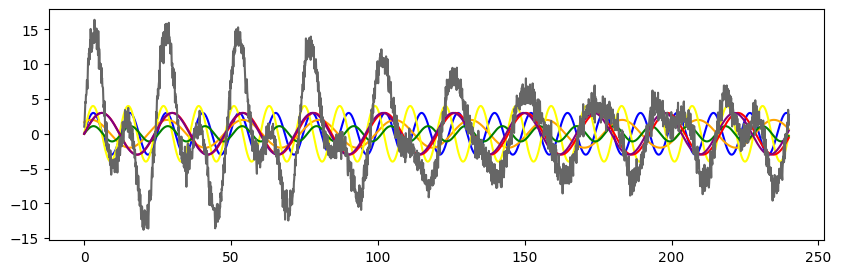

In [ ]:
tempo = np.arange(0, 10*24, 0.1) # tempo em horas
componenteM2 = 3 * np.sin(2*np.pi*tempo/12.4206012) #Principal lunar semidiurna
componenteS2 = 4 * np.sin(2*np.pi*(tempo)/12) #Principal solar semidiurna
componenteN2 = 1.1 * np.sin(2*np.pi*(tempo)/12.65834751) #Maior lunar eliptica semidiurna
componenteK1 = 3 * np.sin(2*np.pi*(tempo)/23.93447213) #lunisolar diurna
componenteO1 = 2 * np.sin(2*np.pi*(tempo + 4)/25.81933871) #lunar diurna
componenteP1 = 3 * np.sin(2*np.pi*(tempo)/24.06588766) #solar diurna

nivel_do_mar = componenteM2 + componenteO1 + componenteS2 + componenteN2 + componenteK1 + componenteP1 + np.random.randn(len(tempo))

fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(tempo, componenteM2, "b")
plt.plot(tempo, componenteO1, "orange")
plt.plot(tempo, componenteS2, "yellow")
plt.plot(tempo, componenteN2, "green")
plt.plot(tempo, componenteP1, "red")
plt.plot(tempo, componenteK1, "purple")
plt.plot(tempo, nivel_do_mar, "0.4")
plt.show()

In [ ]:
slider_comp = wid.FloatSlider(value= 1.5, min= 1.0, max= 5.0, step= 0.1, description= "Amplitude da Maré")
slider_fase = wid.FloatSlider(value= 180, min= 0, max=360, sep= 1.0, description= "fase da componente")

def atualizar_plot(amplitude_comp, fase_graus):
    tempo = np.arange(0, 10*24, 0.1)  # 10 dias com passo de 0.1 h
    d2r = np.pi / 180
    fase_rad = fase_graus * d2r  # Convertendo fase para radianos
    # Componentes com fase variável aplicada a todos
    componenteM2 = amplitude_comp * np.cos(((tempo*28.9841042)*d2r) + fase_rad)
    componenteS2 = amplitude_comp * np.cos(((tempo*30)*d2r) + fase_rad)
    componenteN2 = amplitude_comp * np.cos(((tempo*28.4397295)*d2r) + fase_rad)
    componenteK1 = amplitude_comp * np.cos(((tempo*15.0410686)*d2r) + fase_rad)
    componenteO1 = amplitude_comp * np.cos(((tempo*13.9430356)*d2r) + fase_rad)
    componenteP1 = amplitude_comp * np.cos(((tempo*14.9589314)*d2r) + fase_rad)

    # Soma das componentes + ruído
    nivel_do_mar2 = componenteM2 + componenteO1 + componenteS2 + componenteN2 + componenteK1 + componenteP1 + np.random.randn(len(tempo))

    # Plotagem
    plt.figure(figsize=(12, 4))
    plt.plot(tempo, nivel_do_mar2, color="0.4", label='Nível do Mar (total)')
    plt.plot(tempo, componenteM2, 'b', alpha=0.7, label='M2')
    plt.plot(tempo, componenteS2, 'gold', alpha=0.7, label='S2')
    plt.plot(tempo, componenteN2, 'green', alpha=0.7, label='N2')
    plt.plot(tempo, componenteK1, 'purple', alpha=0.7, label='K1')
    plt.plot(tempo, componenteO1, 'orange', alpha=0.7, label='O1')
    plt.plot(tempo, componenteP1, 'red', alpha=0.7, label='P1')

    plt.title('Simulação do Nível do Mar com Fase Variável')
    plt.xlabel('Tempo (horas)')
    plt.ylabel('Nível')
    plt.legend(loc='upper right', ncol=3)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Interatividade com widgets
wid.interact(atualizar_plot, amplitude_comp=slider_comp, fase_graus=slider_fase)

interactive(children=(FloatSlider(value=1.5, description='Amplitude da Maré', max=5.0, min=1.0), FloatSlider(v…

<function __main__.atualizar_plot(amplitude_comp, fase_graus)>

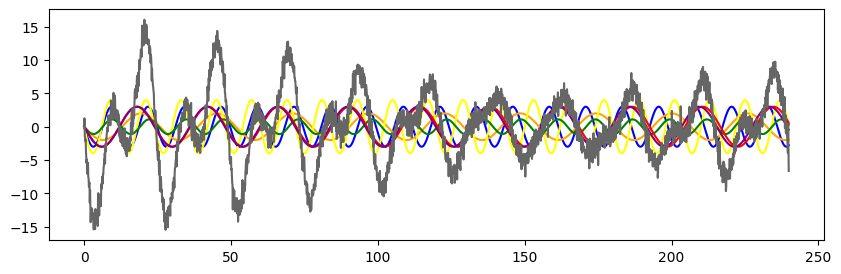

In [ ]:
#Está criando um numpy como tempo multiplicando as 24 hrs do dia com 10 que são os números de dias
tempo = np.arange(0, 10*24, 0.1)
#função para transformar o meu cálculo em radianos já que o cosseno trabalha com radianos apenas.
ajuste_rad = np.pi/180

#criar uma nova função para ler os harmOnicos com a equação que já vi
componenteM2 = 3 * np.cos(((tempo*28.9841042)*ajuste_rad)+90*d2r)
componenteS2 = 4 * np.cos(((tempo*30)*ajuste_rad)+90*ajuste_rad) #Principal solar semidiurna
componenteN2 = 1.1 * np.cos(((tempo*28.4397295)*ajuste_rad)+90*d2r) #Maior lunar eliptica semidiurna
componenteK1 = 3 * np.cos(((tempo*15.0410686)*ajuste_rad)+90*d2r) #lunisolar diurna
componenteO1 = 2 * np.cos(((tempo*13.9430356)*ajuste_rad)+90*d2r) #lunar diurna
componenteP1 = 3 * np.cos(((tempo*14.9589314)*ajuste_rad)+90*d2r) #solar diurna

nivel_do_mar2 = componenteM2 + componenteO1 + componenteS2 + componenteN2 + componenteK1 + componenteP1 + np.random.randn(len(tempo))

fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(tempo, componenteM2, "b")
plt.plot(tempo, componenteO1, "orange")
plt.plot(tempo, componenteS2, "yellow")
plt.plot(tempo, componenteN2, "green")
plt.plot(tempo, componenteP1, "red")
plt.plot(tempo, componenteK1, "purple")
plt.plot(tempo, nivel_do_mar2, "0.4")
plt.show()


In [ ]:
?np.cos

In [ ]:
def func(tempo, a_M1, f_M1, a_M2, f_M2):
    M1 = a_M1 * np.sin(2*np.pi*(tempo + f_M1)/12.2)
    M2 = a_M2 * np.sin(2*np.pi*(tempo + f_M2)/24.3)
    altura = M1 + M2
    return altura


In [ ]:
# curve fit
parametros, pcov = curve_fit(func, tempo, nivel_do_mar)
print(parametros)

predicao = func(tempo, *parametros)

In [ ]:
plt.plot(tempo, nivel_do_mar)
plt.plot(tempo, predicao)

In [ ]:
plt.plot(tempo, nivel_do_mar-predicao)